In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Linear Least Squares Example

In this notebook, we demonstrate a simple linear regression problem using Gaussian linear least squares. We also show how manipulating the covariance matrices can affect the posterior model.

Consider a simple linear regression problem where we want to fit a straight line $y = ax + b$ to a set of data points $(x_i, y_i)$. In matrix notation, the forward model can be written as:

$$
\mathbf{d} = \mathbf{Gm} + \mathbf{e}
$$

Here, $\mathbf{d}$ is the data vector containing $y_i$ , $\mathbf{m} = [a, b]^T$ is the model parameter vector, $\mathbf{G}$ is the design matrix, and $\mathbf{e}$is the error term.

The design matrix $\mathbf{G}$would look like:

$$
\mathbf{G} = \begin{pmatrix}
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\
x_n & 1
\end{pmatrix}
$$

### Posterior model 

Posterior model in a Bayesian framework with Gaussian uncertainties defined by:

$$
\mathbf{m}_{\text{post}} = \mathbf{m}_{\text{prior}} + \mathbf{C}_{\text{m}} \mathbf{G}^T \left( \mathbf{G} \mathbf{C}_{\text{m}} \mathbf{G}^T + \mathbf{C}_{\text{d}} \right)^{-1} \left( \mathbf{d}_{\text{obs}} - \mathbf{G} \mathbf{m}_{\text{prior}} \right)
$$


This equation incorporates both the model and data covariance matrices $( \mathbf{C}_{\text{m}} $ and $ \mathbf{C}_{\text{d}} $), as well as the design matrix $ \mathbf{G} $.

### Covariance Matrices

1. **Data Covariance Matrix ($ \mathbf{C}_{\text{d}} $)**: If the errors $e_i$ are independent and identically distributed with variance $\sigma^2$, then $\mathbf{C}_{\text{d}} $ is a diagonal matrix with $\sigma^2$ along the diagonal.

$$
\mathbf{C}_{\text{d}} = \sigma^2 \mathbf{I}
$$

2. **Model Covariance Matrix ($\mathbf{C}_{\text{m}} $)**: This matrix represents the uncertainties in the model parameters $a$ and $b$. If we believe that $a$ and $b$ are uncorrelated and have variances $ \sigma_a^2$ and $\sigma_b^2$ respectively, then:

$$
\mathbf{C}_{\text{m}} = \begin{pmatrix}
\sigma_a^2 & 0 \\
0 & \sigma_b^2
\end{pmatrix}
$$

If there are off-diagonal terms, this means that the model parameters (here, $a$ and $b$ are correlated).

### Constraining the Posterior

To limit the difference between the posterior and prior models:

- Make $\sigma_a^2$ and $\sigma_b^2$ small to constrain $a$ and $b$ close to their prior estimates.
- Increase $\sigma^2$ in $\mathbf{C}_{\text{d}}$ to give less weight to the data.

By manipulating these covariance matrices, you can control how much the posterior model is allowed to deviate from the prior.




In [2]:
# Generate synthetic data for a simple linear model y = ax + b
np.random.seed(0)
n = 20
a_true = 2.0
b_true = 1.0
x = np.linspace(0, 10, n)
y_true = a_true * x + b_true
noise_stddev = 2
y_obs = y_true + np.random.normal(0, noise_stddev, n)

Prior model

In [3]:
# Prior model m_prior = [a_prior, b_prior]
m_prior = np.array([1.5, 0.5])

# Generate prior line
y_prior = m_prior[0] * x + m_prior[1]

Build the matrices

In [4]:
# Design matrix G
G = np.vstack((x, np.ones(n))).T

# Data covariance matrix C_d (diagonal with noise variance)
C_d = np.eye(n) * noise_stddev**2

# Model covariance matrix C_m
C_m = np.array([[0.001, 0], [0, 0.001]])

# Cross-covariance matrix C_md = C_m * G^T
C_md = C_m.dot(G.T)

# Compute the posterior model m_post
# Compute the inverse of the term inside the parentheses
inv_term = np.linalg.inv(G.dot(C_m).dot(G.T) + C_d)

Check condition number of matrices (only C_d for now)

In [5]:
# check condition number of C_d is close to 1 (if much greater than 1, ill-conditioned)
condition_number = np.linalg.cond(C_d)
print(f"The condition number of C_d is {condition_number}")

The condition number of C_d is 1.0


Calculate posterior

In [6]:
# Compute the posterior model m_post
m_post = m_prior + C_m.dot(G.T).dot(inv_term).dot(y_obs - G.dot(m_prior))

# Generate posterior line
y_post = m_post[0] * x + m_post[1]

Plot results

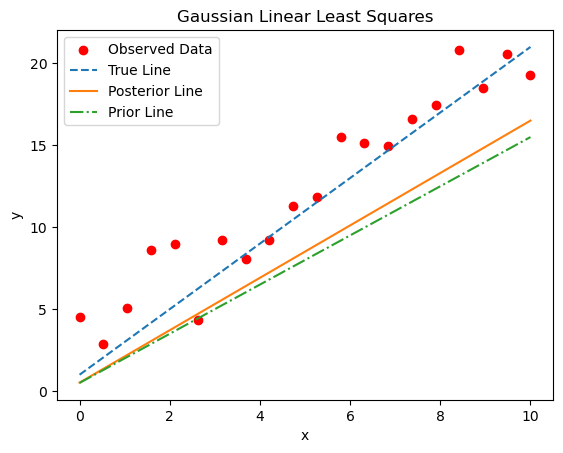

True parameters: a = 2.0, b = 1.0
Prior parameters: a = 1.5, b = 0.5
Posterior parameters: a = 1.5986848968268286, b = 0.5181355457798862


In [7]:
# Generate prior line
y_prior = m_prior[0] * x + m_prior[1]

# Plotting
plt.figure()
plt.scatter(x, y_obs, label="Observed Data", c="red")
plt.plot(x, y_true, label="True Line", linestyle="--")
plt.plot(x, y_post, label="Posterior Line")
plt.plot(x, y_prior, label="Prior Line", linestyle="-.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian Linear Least Squares")
plt.show()

print(f"True parameters: a = {a_true}, b = {b_true}")
print(f"Prior parameters: a = {m_prior[0]}, b = {m_prior[1]}")
print(f"Posterior parameters: a = {m_post[0]}, b = {m_post[1]}")

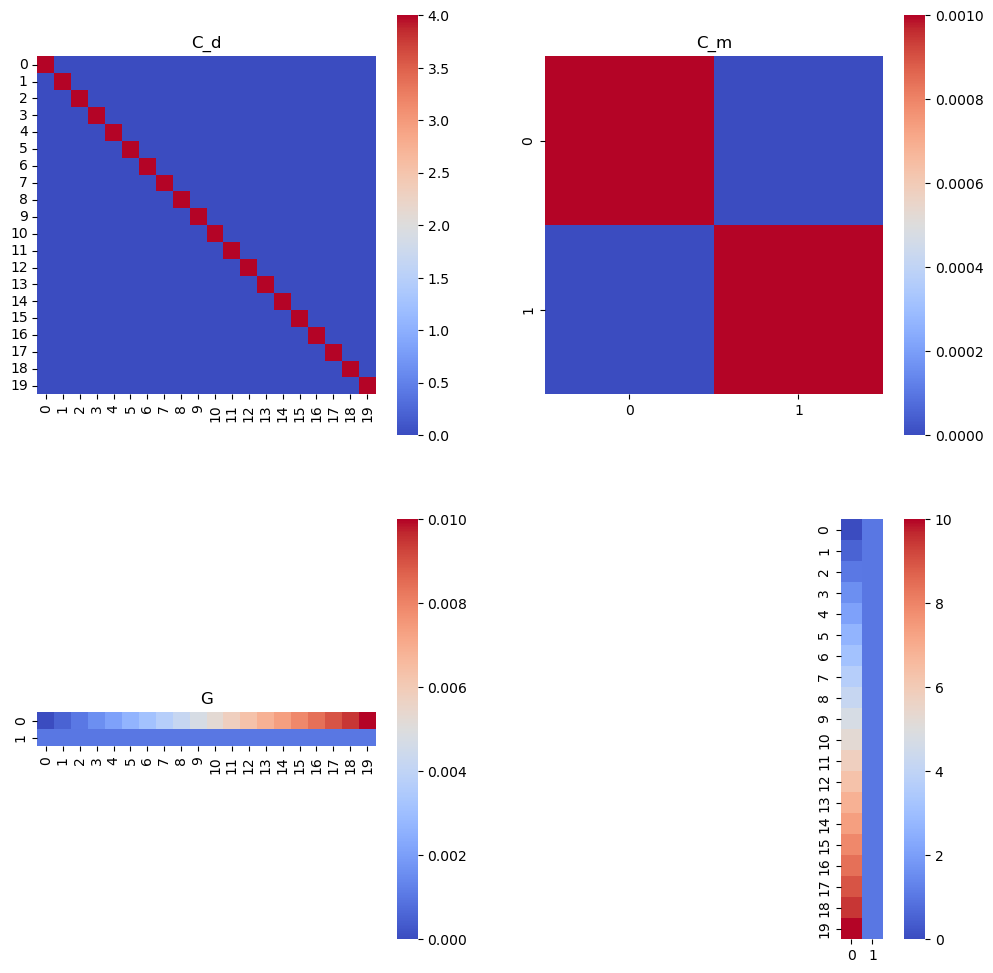

In [8]:
# Plotting the difference matrices
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs = axs.flatten()
sns.heatmap(C_d, ax=axs[0], cmap="coolwarm", cbar=True, square=True)
axs[0].set_title("C_d")

sns.heatmap(C_m, ax=axs[1], cmap="coolwarm", cbar=True, square=True)
axs[1].set_title("C_m")

sns.heatmap(C_md, ax=axs[2], cmap="coolwarm", cbar=True, square=True)
axs[2].set_title("C_md")

sns.heatmap(G, ax=axs[3], cmap="coolwarm", cbar=True, square=True)
axs[2].set_title("G")

plt.show()

## Examples with different values of regularisation

In [9]:
def calculate_posterior(sig_a2=0.01, sig_b2=0.01):
    # Design matrix G
    G = np.vstack((x, np.ones(n))).T

    # Data covariance matrix C_d (diagonal with noise variance)
    C_d = np.eye(n) * noise_stddev**2

    # Model covariance matrix C_m
    C_m = np.array([[sig_a2, 0], [0, sig_b2]])

    # Compute the inverse of the term inside the parentheses
    inv_term = np.linalg.inv(G.dot(C_m).dot(G.T) + C_d)

    # Compute the posterior model m_post
    m_post = m_prior + C_m.dot(G.T).dot(inv_term).dot(y_obs - G.dot(m_prior))

    return m_post

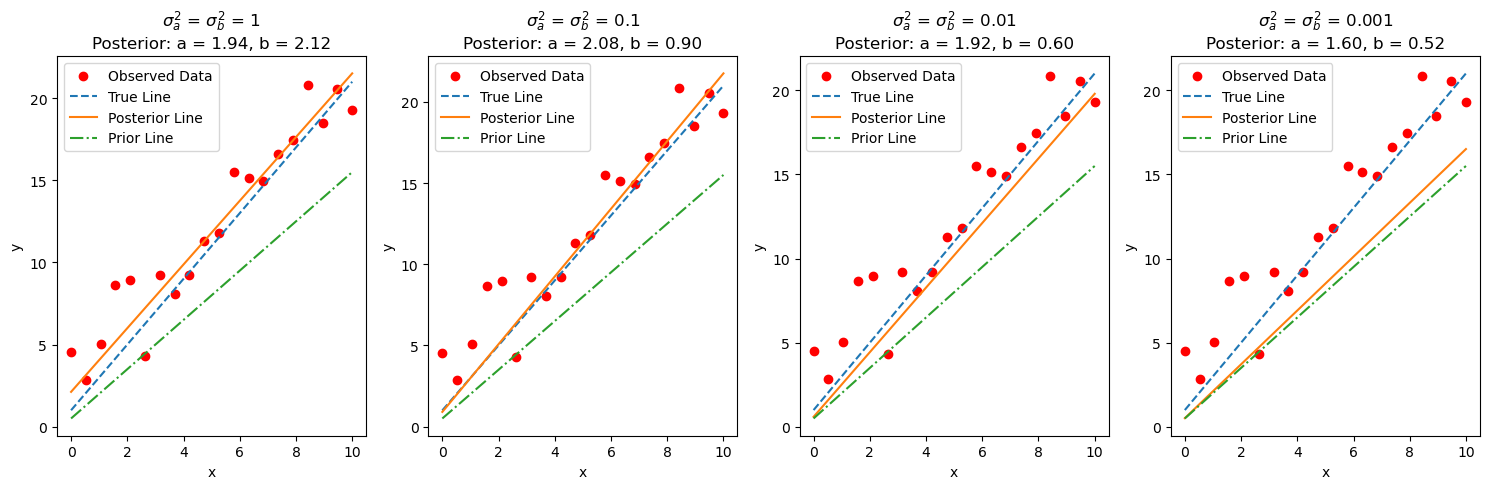

True parameters: a = 2.0, b = 1.0
Prior parameters: a = 1.5, b = 0.5
True parameters: a = 2.0, b = 1.0
Prior parameters: a = 1.5, b = 0.5
True parameters: a = 2.0, b = 1.0
Prior parameters: a = 1.5, b = 0.5


In [10]:
m_post_sig = []
sig2_values = [1, 0.1, 0.01, 0.001]

for sig2 in sig2_values:
    m_post_sig.append(calculate_posterior(sig2, sig2))

n_plots = len(m_post_sig)
fig, axs = plt.subplots(1, n_plots, figsize=(15, 5))

for i, (m_post, sig2) in enumerate(zip(m_post_sig, sig2_values)):
    # Generate posterior line
    y_post = m_post[0] * x + m_post[1]

    # Plotting
    axs[i].scatter(x, y_obs, label="Observed Data", c="red")
    axs[i].plot(x, y_true, label="True Line", linestyle="--")
    axs[i].plot(x, y_post, label="Posterior Line")
    axs[i].plot(x, y_prior, label="Prior Line", linestyle="-.")

    axs[i].legend()
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_title(
        f"$\sigma_a^2$ = $\sigma_b^2$ = {sig2}\nPosterior: a = {m_post[0]:.2f}, b = {m_post[1]:.2f}"
    )

plt.tight_layout()
plt.show()